In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')
df2 = df.copy()

In [9]:
y= df['diagnosis']

In [4]:
X= df.drop(['id','diagnosis'],axis=1)

In [5]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
enc.fit(df[['diagnosis']])
df[['diagnosis']]=enc.transform(df[['diagnosis']])
df['diagnosis'] =df['diagnosis'].astype('int')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, r2_score, accuracy_score,classification_report,roc_curve
from sklearn.model_selection import (GridSearchCV, KFold, train_test_split, cross_val_score)

#modelling 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pickle

In [10]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

X_train2,X_test2, y_train2,y_test2 = train_test_split(X,y,test_size=.3,random_state=42)

In [11]:
X_test.shape

(171, 30)

In [ ]:
#Standadize data set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#test NOT need 'FIT' trandfrom only transfrom
X_test = scaler.transform(X_test)

In [12]:
logisticR = LogisticRegression()
logisticR.fit(X_train,y_train)
y_hat = logisticR.predict(X_test)
logisticR.score(X_test,y_test)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9649122807017544

In [13]:
X2 = df[['radius_mean','compactness_mean','concave_points_mean','compactness_worst','concavity_worst','concave_points_worst']]
features = df[['radius_mean','compactness_mean','concave_points_mean','compactness_worst','concavity_worst','concave_points_worst']]
feature_list = features.columns.to_list()
feature_list

['radius_mean',
 'compactness_mean',
 'concave_points_mean',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst']

In [14]:
X2.head()

,radius_mean,compactness_mean,concave_points_mean,compactness_worst,concavity_worst,concave_points_worst
0,17.99,0.27760,0.14710,0.6656,0.7119,0.2654
1,20.57,0.07864,0.07017,0.1866,0.2416,0.1860
2,19.69,0.15990,0.12790,0.4245,0.4504,0.2430
3,11.42,0.28390,0.10520,0.8663,0.6869,0.2575
4,20.29,0.13280,0.10430,0.2050,0.4000,0.1625


In [15]:
df3 = df2.copy()
y2= df3['diagnosis']

In [38]:
#Train test split
X2_train_b,X2_test_b, y2_train,y2_test = train_test_split(X2,y2,test_size=.3,random_state=42)

In [41]:
X2_train_b.to_csv('x2_train.csv',index=False)


In [17]:
#Standadize data set
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train_b)

#test NOT need 'FIT' trandfrom only transfrom
X2_test = scaler.transform(X2_test_b)

In [18]:
logisticR2 = LogisticRegression()
logisticR2.fit(X2_train,y2_train)
logisticR2.score(X2_test,y2_test)

0.9298245614035088

In [19]:
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(scaler, f)

#create model pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(logisticR2, f)

In [20]:
import shap
explainer = shap.Explainer(logisticR2, X2_train)
#GENERATE SHAP VALUES
shap_values = explainer.shap_values(X2_test)
shap_values[0]

array([-0.80253268,  0.16867614, -0.75414763, -0.09532279, -0.08563263,
       -0.43673314])

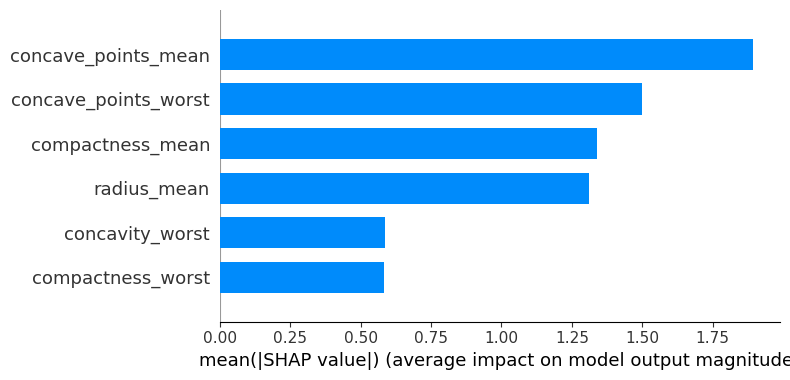

In [ ]:
shap.summary_plot(shap_values, X2_test, plot_type="bar",feature_names=feature_list)

In [33]:
#create shap visual from the pickle model
import joblib
model = joblib.load("model.pkl")
explainer2 =shap.Explainer(model,X2_test)
shap_values2 = explainer2.shap_values(x4)


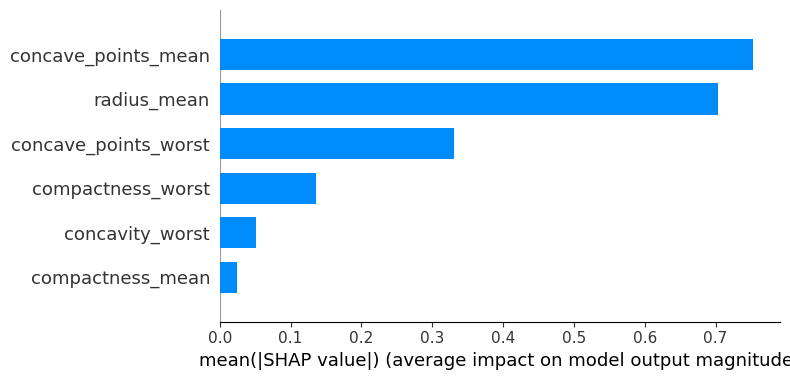

In [34]:
shap.summary_plot(shap_values2, x4, plot_type="bar",feature_names=feature_list)

In [28]:
x3=X2_test[0]
#need to reshape to matching format
x4 =x3.reshape(1, -1)
x4

array([[-0.48313229,  0.04881894, -0.27160323, -0.07603328, -0.00713329,
        -0.19338258]])

In [ ]:
x3

array([-0.48313229,  0.04881894, -0.27160323, -0.07603328, -0.00713329,
       -0.19338258])

In [ ]:
X2_test

array([[-4.83132293e-01,  4.88189449e-02, -2.71603231e-01,
        -7.60332839e-02, -7.13329260e-03, -1.93382575e-01],
       [ 1.34906186e+00, -7.88340504e-03,  8.24931429e-01,
        -1.04328486e-01,  1.03444793e-03,  1.01968394e+00],
       [ 3.63584944e-01,  3.71435764e-01,  8.61040076e-01,
        -6.52541593e-02,  5.64608545e-01,  5.88684856e-01],
       ...,
       [-1.20977993e+00,  5.10258759e-01, -2.99481231e-01,
         3.09320420e-01,  4.08910991e-01, -2.30997041e-01],
       [-1.00835213e-01,  1.26694184e+00,  5.08449754e-01,
         9.93794832e-01,  3.55310194e-01,  5.99655741e-01],
       [-3.64195424e-01,  6.11931938e-01, -2.29387974e-01,
         2.26236306e+00,  2.57387272e+00,  6.62346517e-01]])

In [ ]:
x6=np.array([[-4.83132293e-01,  4.88189449e-02, -2.71603231e-01,
        -7.60332839e-02, -7.13329260e-03, -1.93382575e-01],
       [ 1.34906186e+00, -7.88340504e-03,  8.24931429e-01,
        -1.04328486e-01,  1.03444793e-03,  1.01968394e+00],
       [ 3.63584944e-01,  3.71435764e-01,  8.61040076e-01,
        -6.52541593e-02,  5.64608545e-01,  5.88684856e-01]])